In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
df = pd.read_excel('/content/Career data_PDA_4053.xlsx')

In [11]:
print(df.head())

  Field of Study Current Occupation   Age  Gender  Years of Experience  \
0       Medicine   Business Analyst  48.0    Male                  7.0   
1      Education          Economist  44.0    Male                 26.0   
2      Education          Biologist  21.0  Female                 27.0   
3      Education   Business Analyst  33.0    Male                 14.0   
4           Arts             Doctor  28.0  Female                  0.0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High               7.0               10.0   
1        Master's                  Low              10.0                3.0   
2        Master's                  NaN               8.0                3.0   
3             PhD               Medium               7.0                9.0   
4             PhD                  Low               3.0                1.0   

   Job Opportunities  ... Job Security  Career Change Interest Skills Gap  \
0  

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               4999 non-null   object 
 1   Current Occupation           4996 non-null   object 
 2   Age                          4996 non-null   float64
 3   Gender                       4993 non-null   object 
 4   Years of Experience          4998 non-null   float64
 5   Education Level              4994 non-null   object 
 6   Industry Growth Rate         4995 non-null   object 
 7   Job Satisfaction             4998 non-null   float64
 8   Work-Life Balance            4997 non-null   float64
 9   Job Opportunities            4993 non-null   float64
 10  Salary                       4994 non-null   object 
 11  Job Security                 4996 non-null   float64
 12  Career Change Interest       4995 non-null   object 
 13  Skills Gap        

In [64]:
print(df.describe())

               Age  Years of Experience  Job Satisfaction  Work-Life Balance  \
count  4996.000000          4998.000000       4998.000000        4997.000000   
mean     39.364892            19.774310          5.496399           5.521513   
std      11.457086            11.527082          2.895880           2.901469   
min      20.000000             0.000000          1.000000           1.000000   
25%      29.000000            10.000000          3.000000           3.000000   
50%      40.000000            20.000000          6.000000           6.000000   
75%      49.000000            30.000000          8.000000           8.000000   
max      59.000000            39.000000         10.000000          10.000000   

       Job Opportunities  Job Security   Skills Gap  Freelancing Experience  \
count        4993.000000   4996.000000  4995.000000             4994.000000   
mean           50.622672      5.523419     5.538739                0.150781   
std            29.025295      2.876791    

In [13]:
#checking missing values

print(df.isnull().sum())


Field of Study                 1
Current Occupation             4
Age                            4
Gender                         7
Years of Experience            2
Education Level                6
Industry Growth Rate           5
Job Satisfaction               2
Work-Life Balance              3
Job Opportunities              7
Salary                         6
Job Security                   4
Career Change Interest         5
Skills Gap                     5
Certifications                 5
Freelancing Experience         6
Geographic Mobility            4
Professional Networks          6
Career Change Events           2
Technology Adoption            4
Likely to Change Occupation    1
dtype: int64


In [14]:
#fix the missing values

#first correcting the data types in certain columns


cols_to_fix = ['Salary', 'Career Change Interest', 'Certifications',
               'Geographic Mobility']

df[cols_to_fix] = df[cols_to_fix].replace(r'[^0-9\.]', '', regex=True)

df[cols_to_fix] = df[cols_to_fix].apply(pd.to_numeric, errors='coerce')


#separating numerical and categorical columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:\n", numeric_cols)
print("\nCategorical columns:\n", categorical_cols)


#using median to fix numerical columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

#using mode to fix categorical columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


Numeric columns:
 Index(['Age', 'Years of Experience', 'Job Satisfaction', 'Work-Life Balance',
       'Job Opportunities', 'Salary', 'Job Security', 'Career Change Interest',
       'Skills Gap', 'Certifications', 'Freelancing Experience',
       'Geographic Mobility', 'Professional Networks', 'Career Change Events',
       'Technology Adoption', 'Likely to Change Occupation'],
      dtype='object')

Categorical columns:
 Index(['Field of Study', 'Current Occupation', 'Gender', 'Education Level',
       'Industry Growth Rate'],
      dtype='object')


/tmp/ipython-input-3127098398.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3127098398.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [15]:
#check for missing values again

print(df.isnull().sum())



Field of Study                 0
Current Occupation             0
Age                            0
Gender                         0
Years of Experience            0
Education Level                0
Industry Growth Rate           0
Job Satisfaction               0
Work-Life Balance              0
Job Opportunities              0
Salary                         0
Job Security                   0
Career Change Interest         0
Skills Gap                     0
Certifications                 0
Freelancing Experience         0
Geographic Mobility            0
Professional Networks          0
Career Change Events           0
Technology Adoption            0
Likely to Change Occupation    0
dtype: int64


Before Years of Experience: Max=39.0, Mean=19.77
After Years of Experience: Max=39.0, Mean=19.77


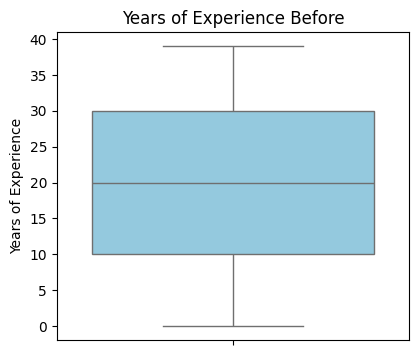

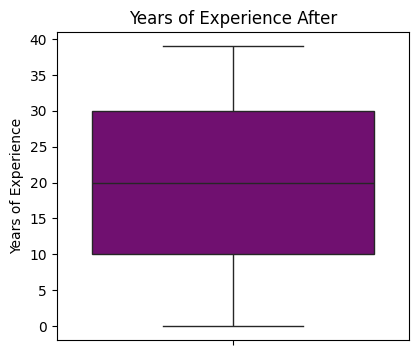

Before Age: Max=59.0, Mean=39.37
After Age: Max=59.0, Mean=39.37


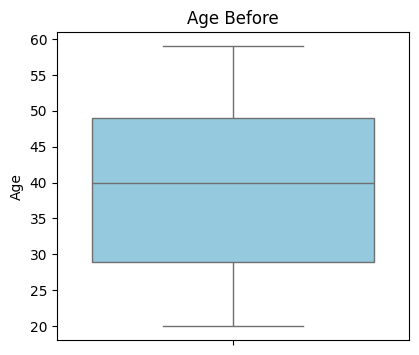

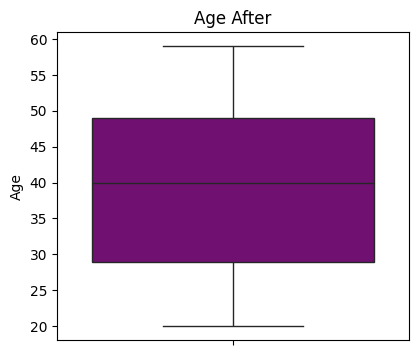

Before Salary: Max=567896543.0, Mean=414874.76
After Salary: Max=285130.125, Mean=116070.65


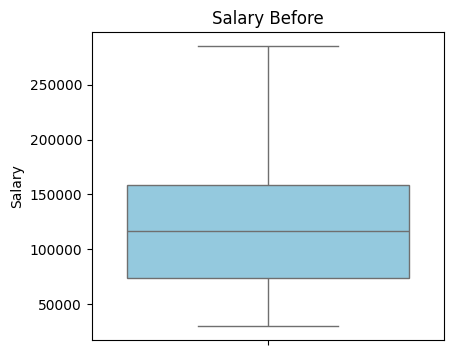

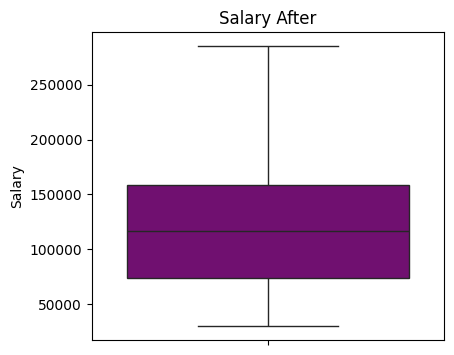

In [16]:

#handling the outliers

# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace values outside bounds with the limits
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

#defining columns to check for outliers

numeric_cols_outliers = ['Years of Experience','Age', 'Salary']

df_cleaned = df.copy()

for col in numeric_cols_outliers: # Use the correct variable name
    if col in df_cleaned.columns:

        #before putting limits
        print(f"Before {col}: Max={df_cleaned[col].max()}, Mean={df_cleaned[col].mean():.2f}")
        df_cleaned = cap_outliers(df_cleaned, col)

        #after putting limits
        print(f"After {col}: Max={df_cleaned[col].max()}, Mean={df_cleaned[col].mean():.2f}")

        #plotting before
        plt.figure(figsize=(10, 4))
        plt.subplot(1,2,1)
        sns.boxplot (y=df_cleaned[col], color='skyblue') # Use df_cleaned for plotting
        plt.title(f"{col} Before")
        plt.show() # Add this to display the plot

        #plotting after
        plt.figure(figsize=(10, 4))
        plt.subplot(1,2,2)
        sns.boxplot ( y=df_cleaned[col], color='purple')
        plt.title (f"{col} After")
        plt.show() # Add this to display the plot

In [17]:
#statistical checks after preprocessing

df_cleaned.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,39.365400,19.774400,5.496600,5.521800,50.621800,116070.652350,5.523800,0.198200,5.539200,0.302800,0.150600,0.307600,5.512000,0.99580,5.484200,0.570800
std,11.452516,11.524776,2.895318,2.900622,29.004976,49185.238203,2.875672,0.398684,2.883076,0.459515,0.357694,0.461546,2.866618,0.81824,2.868413,0.495011
min,20.000000,0.000000,1.000000,1.000000,1.000000,30016.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
25%,29.000000,10.000000,3.000000,3.000000,25.000000,73543.250000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.00000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,116424.000000,6.000000,0.000000,6.000000,0.000000,0.000000,0.000000,6.000000,1.00000,5.000000,1.000000
75%,49.000000,30.000000,8.000000,8.000000,76.000000,158178.000000,8.000000,0.000000,8.000000,1.000000,0.000000,1.000000,8.000000,2.00000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,285130.125000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,2.00000,10.000000,1.000000


In [18]:
#doing the EDA now

#Q1. What proportion of professionals are likely to change occupations?

import plotly.express as px

target = 'Likely to Change Occupation'
df_plot = df_cleaned.copy()

fig = px.pie(df_plot, names=target,
    title='Overall Career Change Intention — Proportion of Professionals',
    color_discrete_sequence=['skyblue', 'salmon'])
fig.show()


In [23]:
#Q2. Does the Field of Study influence openness to career change?

fig = px.bar(df_plot,x='Field of Study',color=target,
    title='Field of Study vs Career Change Likelihood',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [72]:
#Q3. How do Work Experience and Age influence the likelihood of changing careers?

fig = px.scatter(df_plot,x='Years of Experience', y='Age',
    color=target,
    title='Experience vs Age by Career Change Likelihood')
fig.show()

In [73]:
#Q4. How do Job Satisfaction and Work-Life Balance influence career change decisions?

fig = px.scatter(df_plot,
    x='Job Satisfaction',
    y='Work-Life Balance',
    color=target,
    title='Job Satisfaction vs Work-Life Balance — Career Change Patterns',
    size='Years of Experience',
    hover_data=['Current Occupation'])
fig.show()

In [32]:
Q5. Does Salary influence the likelihood of changing careers?

fig = px.box(df_plot, x=target, y='Salary', color=target,
    title='Salary Distribution by Career Change Likelihood')
fig.update_layout(
    yaxis_title='Salary ',
    xaxis_title='Likely to Change Occupation')
fig.show()

Object `careers` not found.


Object `factors` not found.


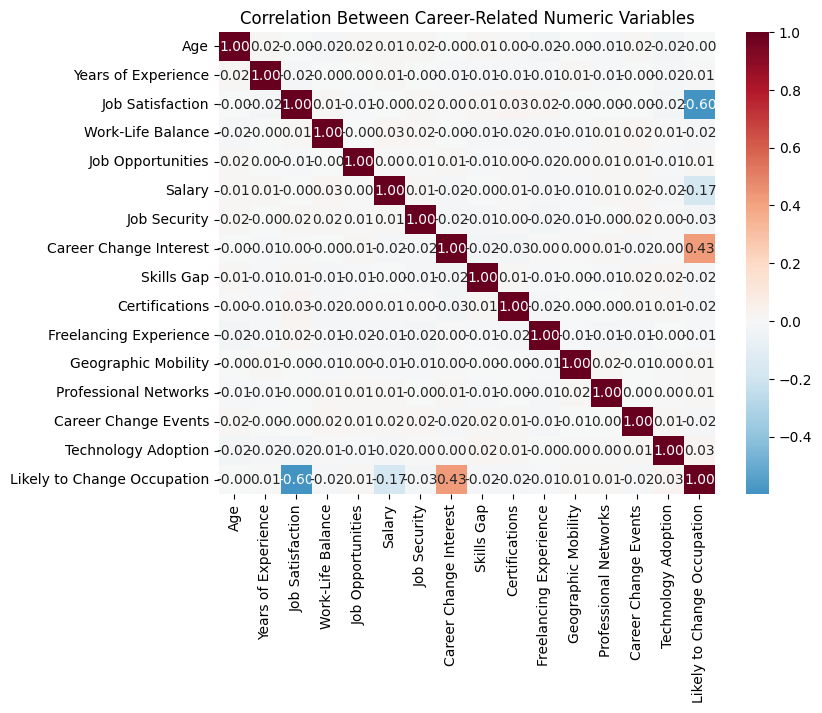

In [76]:
Q6. What relationships exist among all numeric career factors?


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title('Correlation Between Career-Related Numeric Variables')
plt.show()